# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [15]:
# <UZUPEŁNIJ>
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train_np, test_np = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [16]:
import pandas as pd
train = pd.DataFrame(train_np)
test = pd.DataFrame(test_np)
print(train.tail())

print('Wszystkich próbek: ' + str(len(train)))
print('Próbki w danych klasach: ')
train.iloc[:,0].value_counts()

        0     1         2          3         4         5         6         7   \
2239  31.0   3.0  0.985425  12.367959  0.965230  0.802650  0.975840  0.043345   
2240  29.0   6.0  0.732868   2.193675  0.451017  0.895804  0.917298  0.656747   
2241  12.0   8.0  0.972539   2.580435  0.604563  0.943933  0.927550  0.412375   
2242  28.0  11.0  0.869988   2.412292  0.474942  0.894748  1.136941  0.723794   
2243  14.0   4.0  0.854293   2.719806  0.675552  0.979863  0.943090  0.494818   

            8         9         10        11        12        13        14  \
2239  0.196795  7.280538  0.013304  0.035287  0.002212  0.000395  0.000086   
2240  0.030173  0.147090  0.012712  0.048700  0.000179  0.000484 -0.000019   
2241  0.027216  0.261505  0.093553  0.169002  0.032028  0.010133  0.000466   
2242  0.003889  0.034966  0.113536  0.209715  0.040135  0.010886  0.001081   
2243  0.010955 -0.045633  0.113165  0.188330  0.037564  0.013313  0.000703   

            15  
2239  0.316025  
2240  0.36

0
9.0     121
22.0    121
29.0    110
26.0     99
13.0     99
34.0     99
11.0     88
10.0     88
35.0     88
5.0      77
23.0     77
30.0     77
24.0     77
31.0     77
1.0      77
12.0     77
33.0     66
15.0     66
4.0      66
25.0     66
14.0     66
28.0     66
32.0     66
2.0      66
27.0     55
3.0      55
7.0      44
6.0      44
8.0      33
36.0     33
Name: count, dtype: int64

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [17]:
# <UZUPEŁNIJ>
train_new = train[train[0].isin([3, 5])]
test_new = test[test[0].isin([3, 5])]
train_new.tail(), test_new.tail()

(       0     1         2         3         4         5         6         7   \
 2169  5.0   5.0  0.857690  2.277905  0.612994  0.817417  1.003127  0.346316   
 2190  5.0   9.0  0.971131  1.413906  0.578289  0.721544  0.779740  0.324182   
 2212  3.0   7.0  0.707130  0.720845  0.376911  0.889243  0.892134  0.712109   
 2214  5.0  10.0  0.775259  2.044054  0.628758  0.724776  0.841946  0.346136   
 2231  3.0   5.0  0.670028  0.981552  0.327937  0.929932  0.919339  0.616894   
 
             8         9         10        11        12        13        14  \
 2169  0.040852  0.321097  0.063552  0.140577  0.019954  0.008255  0.000285   
 2190  0.049910  0.555985  0.066759  0.154062  0.022749  0.007653  0.000204   
 2212  0.035523  0.243237  0.064845  0.177120  0.027757  0.010349  0.000218   
 2214  0.056415  0.433102  0.060213  0.177968  0.026030  0.010985  0.000208   
 2231  0.024085  0.161280  0.059037  0.147309  0.027077  0.010910  0.000161   
 
             15  
 2169  1.364990  
 2190 

### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
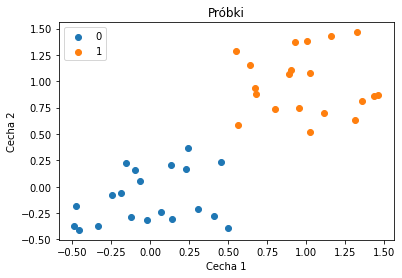

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

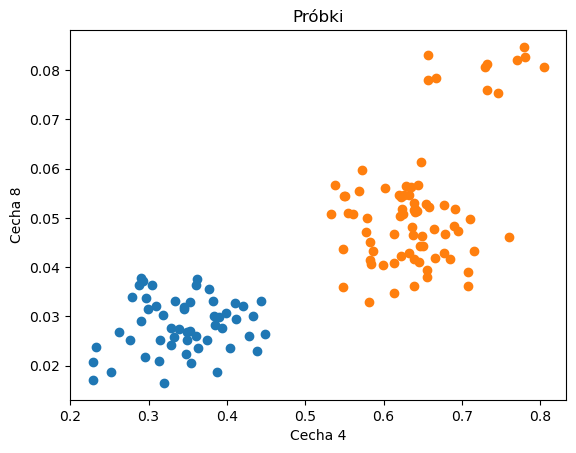

In [18]:
import matplotlib.pyplot as plt
import numpy as np

class_3 = train_new[train_new[0] == 3]
class_5 = train_new[train_new[0] == 5]
features_3 = class_3.iloc[:, [4,8]].values
features_5 = class_5.iloc[:, [4,8]].values
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 4")
plt.ylabel(f"Cecha 8")
plt.scatter(features_3[:,0], features_3[:,1])
plt.scatter(features_5[:,0], features_5[:,1])

## Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktami `x` i `y` uwzględniając wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$


In [19]:
# <UZUPEŁNIJ PONIZEJ>
import math
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
    result = 0
    for x1, y1 in zip(x,y):
        result += (x1 - y1) ** 2
    return math.sqrt(result)

edist(x, y, features) # wynik: 4.242640687119285

4.242640687119285

### Zadanie 6  

Zaimplementuj klasyfikator **najbliższego sąsiada** (*k-Nearest Neighbor*).  

1. Oblicz odległość każdego elementu ze zbioru **testowego** do każdego elementu ze zbioru **treningowego**.  
2. Znajdź element ze zbioru **treningowego**, który znajduje się najbliżej klasyfikowanego elementu ze zbioru **testowego**.  
3. Przypisz klasyfikowanemu elementowi klasę najbliższego sąsiada.  


In [20]:
from scipy.spatial import distance

train_data = train_new.values
test_data = test_new.values

def find_kNN(train_data, test_point):
    nearest_neighbor = None
    nearest_dist = float('inf')

    for element in train_data:
        dist = distance.euclidean(test_point, element)
        if dist < nearest_dist:
            nearest_dist = dist
            nearest_neighbor = element
    return nearest_neighbor, nearest_dist

# print(test_data[0])
# print(find_kNN(train_data, test_data[0]))
for test_point in test_data:
    neighbor, dist = find_kNN(train_data, test_point)
    print(f"Punkt: {test_point[0]} -> {neighbor[0]} w odległości: {dist}")

Punkt: 3.0 -> 3.0 w odległości: 2.0025611922988458
Punkt: 3.0 -> 3.0 w odległości: 2.0112527337136776
Punkt: 5.0 -> 5.0 w odległości: 1.0144610116845214
Punkt: 5.0 -> 5.0 w odległości: 1.0974308298697035
Punkt: 5.0 -> 5.0 w odległości: 1.0076377970444785
Punkt: 3.0 -> 3.0 w odległości: 1.0759136843788413
Punkt: 3.0 -> 3.0 w odległości: 1.0613266195765598
Punkt: 5.0 -> 5.0 w odległości: 1.0252335380089515
Punkt: 5.0 -> 5.0 w odległości: 1.0101480313579838
Punkt: 3.0 -> 3.0 w odległości: 1.3469571146388695
Punkt: 3.0 -> 3.0 w odległości: 2.011937963422938
Punkt: 3.0 -> 3.0 w odległości: 2.0120185404986595
Punkt: 5.0 -> 5.0 w odległości: 1.0238147944604952
Punkt: 5.0 -> 5.0 w odległości: 1.0862843657558183
Punkt: 5.0 -> 5.0 w odległości: 1.0074025865756953
Punkt: 3.0 -> 3.0 w odległości: 1.11502321190123
Punkt: 3.0 -> 3.0 w odległości: 1.1226203525228928
Punkt: 5.0 -> 5.0 w odległości: 1.0286758050278735
Punkt: 5.0 -> 5.0 w odległości: 1.0308941754092875
Punkt: 3.0 -> 3.0 w odległości: 1.

### Zadanie 7
Przeprowadź klasyfikację liści dla wybranych wcześniej dwóch klas, korzystając z własnej implementacji modelu NN.

Następnie wyświetl wyniki klasyfikacji:
* Próbki treningowe i testowe.
* Każdą klasę oznacz innym kolorem.
* Próbki testowe wyróżnij innym markerem.

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

[3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0]


C:\Users\jasin\AppData\Local\Temp\ipykernel_20292\4253086129.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=colors[predictions[i]], marker='x', edgecolors='black')


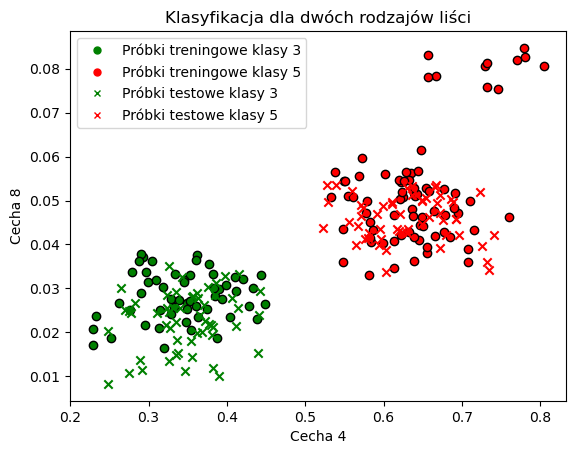

In [21]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

def kNN_predict(train_data, train_labels, test_point):
    nearest_neighbor = None
    nearest_label = None
    nearest_dist = float('inf')

    for idx, element in enumerate(train_data):
        dist = distance.euclidean(test_point, element)
        if dist < nearest_dist:
            nearest_dist = dist
            nearest_neighbor = element
            nearest_label = train_labels[idx]
    return nearest_label, nearest_neighbor, nearest_dist

# print(train_new, test_new)
x_train = train_new.iloc[:, [4,8]].values
y_train = train_new.iloc[:,0].values
x_test = test_new.iloc[:, [4,8]].values
y_test = test_new.iloc[:,0].values

predictions = []
for test_point in x_test:
    label, neighbor, dist = kNN_predict(x_train, y_train, test_point)
    predictions.append(label)

print(predictions)

colors = {3.0: 'green', 5.0: 'red'}
for i, point in enumerate(x_train):
    plt.scatter(point[0], point[1], c=colors[y_train[i]], marker='o', edgecolors='black')

for i, point in enumerate(x_test):
    plt.scatter(point[0], point[1], c=colors[predictions[i]], marker='x', edgecolors='black')

plt.xlabel("Cecha 4")
plt.ylabel("Cecha 8")
plt.title("Klasyfikacja dla dwóch rodzajów liści")
train_handle_3 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 3')
train_handle_5 = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 5')
test_handle_3 = mlines.Line2D([], [], color='green', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 3')
test_handle_5 = mlines.Line2D([], [], color='red', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 5')
plt.legend(handles=[train_handle_3, train_handle_5, test_handle_3, test_handle_5], loc='upper left')
plt.show()

### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [22]:
correct_pred = np.sum(predictions == y_test)
accuracy = (correct_pred / len(y_test)) * 100
accuracy

100.0

### Zadanie 9

Do zbioru dodaj jeszcze **trzy** dowolne rodzaje liści (klasy) i przeprowadź eksperyment ponownie.

Łącznie zbiór będzie zawierał **pięć** klas. Wynik wciąż należy przedstawić dla tych samych dwóch cech co wcześniej.


C:\Users\jasin\AppData\Local\Temp\ipykernel_20292\964889617.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(point[0], point[1], c=colors[predictions[i]], marker='x', edgecolors='black')


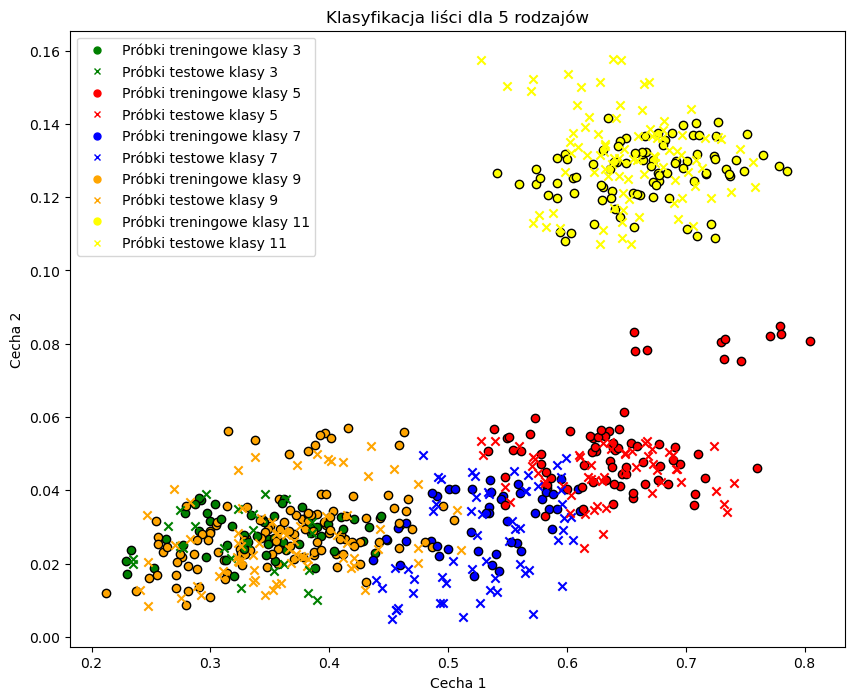

Accuracy: 72.73%


In [23]:
train_data_2 = train[train[0].isin([3, 5, 7, 9, 11])]
test_data_2 = test[test[0].isin([3, 5, 7, 9, 11])]
# print(train_data_2, test_data_2)

x_train_2 = train_data_2.iloc[:, [4,8]].values
y_train_2 = train_data_2.iloc[:,0].values
x_test_2 = test_data_2.iloc[:, [4,8]].values
y_test_2 = test_data_2.iloc[:,0].values
# print(x_train_2, y_train_2, x_test_2, y_test_2)

predictions = []
for test_point in x_test_2:
    label, neighbor, dist = kNN_predict(x_train_2, y_train_2, test_point)
    predictions.append(label)

plt.figure(figsize=(10, 8))
colors = {3.0: 'green', 5.0: 'red', 7.0: 'blue', 9.0: 'orange', 11.0: 'yellow'}
for i, point in enumerate(x_train_2):
    plt.scatter(point[0], point[1], c=colors[y_train_2[i]], marker='o', edgecolors='black')

for i, point in enumerate(x_test_2):
    plt.scatter(point[0], point[1], c=colors[predictions[i]], marker='x', edgecolors='black')

train_handle_3 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 3')
test_handle_3 = mlines.Line2D([], [], color='green', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 3')
train_handle_5 = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 5')
test_handle_5 = mlines.Line2D([], [], color='red', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 5')
train_handle_7 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 7')
test_handle_7 = mlines.Line2D([], [], color='blue', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 7')
train_handle_9 = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 9')
test_handle_9 = mlines.Line2D([], [], color='orange', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 9')
train_handle_11 = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=5, label='Próbki treningowe klasy 11')
test_handle_11 = mlines.Line2D([], [], color='yellow', marker='x', linestyle='None', markersize=5, label='Próbki testowe klasy 11')
plt.legend(handles=[train_handle_3, test_handle_3, train_handle_5, test_handle_5, train_handle_7, test_handle_7,
                   train_handle_9, test_handle_9,train_handle_11, test_handle_11], loc='upper left')
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.title("Klasyfikacja liści dla 5 rodzajów")
plt.show()

correct_pred = np.sum(predictions == y_test_2)
accuracy = (correct_pred / len(y_test_2)) * 100
print(f"Accuracy: {accuracy:.2f}%")

### Zadanie 10

Przeprowadź eksperyment ponownie, używając tych samych parametrów co w zadaniu 9, ale z większą liczbą cech: 3, 5 i 10.

> W tym przypadku nie wyświetlaj wykresu - oblicz jedynie dokładność klasyfikacji.
> Zwiększając liczbę cech, dodawaj nowe cechy, zachowując wcześniejsze.

In [24]:
features = [4,5,6,7,8,9,10,11,12,13]

for feat_num in [3,5,10]:
    x_train_2 = train_data_2.iloc[:, features[:feat_num]].values
    y_train_2 = train_data_2.iloc[:,0].values
    x_test_2 = test_data_2.iloc[:, features[:feat_num]].values
    y_test_2 = test_data_2.iloc[:,0].values

    predictions = []
    for test_point in x_test_2:
        label, neighbor, dist = kNN_predict(x_train_2, y_train_2, test_point)
        predictions.append(label)

    correct_pred = np.sum(predictions == y_test_2)
    accuracy = (correct_pred / len(y_test_2)) * 100
    print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 71.04%
Accuracy: 81.14%
Accuracy: 80.47%


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

### Obserwacje:
* Rodzaje liści są dobrze rozdzielone w przestrzeni cech, co pozwoliło stworzyć idealny klasyfikator na poziomie **100%**.
* Zwiększenie rodzajów liści sprawiło, że punkty zaczęły się na siebie nakładać, co spowodowało zmniejszenie dokładności do **72%**.
* Dodanie trzeciej cechy nie poprawiło znacznie wyników (**71%**), najprawdopodobniej nie była zbyt istotna.
* Zwiększenie ilości cech do 5 znacznie poprawiło wyniki, bo aż do **81%**.
* Zwiększenie ilości cech do 10 jednak spowodowało lekki spadek (**80%**), spowodowany najprawdopodobniej nadmiarem informacji. 

### Wnioski:
* Zwiększenie cech pomaga poprawić skuteczność, lecz ich nadmiar niekoniecznie. 
* Należy dobierać cechy kluczowe, które faktycznie mają wpływ na poprawę wyników.
* Wyniki można poprawić poprzez głębszą analizę korelacji między cechami.